In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import collections
import sklearn
import scikitplot as skplt
import string

In [121]:
test_set = pd.read_csv('drugsComTest_raw.csv')
training_set = pd.read_csv('drugsComTrain_raw.csv')
training_set.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch""",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent on oxycontin.""",9,27-Nov-16,37


In [58]:
print(f'train has {training_set.shape[0]} number of rows and {training_set.shape[1]} number of columns')
print(f'train has {test_set.shape[0]} number of rows and {test_set.shape[1]} number of columns')
print(f'There are {training_set.drugName.value_counts().size} kinds of drugs in training set')
print(f'There are {test_set.drugName.value_counts().size} kinds of drugs in test set')

train has 161297 number of rows and 7 number of columns
train has 53766 number of rows and 7 number of columns
There are 3436 kinds of drugs in training set
There are 2637 kinds of drugs in test set


In [59]:
from bs4 import BeautifulSoup
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stops = set(stopwords.words('english')) #english stopwords

stemmer = SnowballStemmer('english') #SnowballStemmer

def cleaning(raw_review):
    # Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # Letters only
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # to lower
    words = letters_only.lower().split()
    # Stopwords remove
    meaningful_words = [w for w in words if not w in stops]
    # Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # Joining words
    return( ' '.join(stemming_words))

#### Combine 2 datasets

In [60]:
data = training_set.append(test_set, ignore_index=True)
data

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
215058,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
215059,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
215060,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
215061,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [120]:
pd.set_option('display.max_colwidth', None)
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,side effect take combin bystol mg fish oil,9,20-May-12,27
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv becam concern began last week start take highest dose two day could hard get bed cranki slept near hour drive home school vacat unusu call doctor monday morn said stick day see school get morn last two day problem free much agreeabl ever less emot good thing less cranki rememb thing overal behavior better tri mani differ medic far effect,8,27-Apr-10,192
2,92703,Lybrel,Birth Control,use take anoth oral contracept pill cycl happi light period max day side effect contain hormon gestoden avail us switch lybrel ingredi similar pill end start lybrel immedi first day period instruct said period last two week take second pack two week third pack thing got even wors third period last two week end third week still daili brown discharg posit side side effect idea period free tempt ala,5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,first time use form birth control glad went patch month first decreas libido subsid downsid made period longer day exact use period day max also made cramp intens first two day period never cramp use birth control happi patch,8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,suboxon complet turn life around feel healthier excel job alway money pocket save account none suboxon spent year abus oxycontin paycheck alreadi spent time got start resort scheme steal fund addict histori readi stop good chanc suboxon put path great life found side effect minim compar oxycontin actual sleep better slight constip truli amaz cost pale comparison spent oxycontin,9,27-Nov-16,37


#### Data Cleaning

In [61]:
data_clean = data
data_clean['review'] = data_clean['review'].apply(cleaning)

In [62]:
data_clean

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,side effect take combin bystol mg fish oil,9,20-May-12,27
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv becam concern ...,8,27-Apr-10,192
2,92703,Lybrel,Birth Control,use take anoth oral contracept pill cycl happi...,5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,first time use form birth control glad went pa...,8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,suboxon complet turn life around feel healthie...,9,27-Nov-16,37
...,...,...,...,...,...,...,...
215058,159999,Tamoxifen,"Breast Cancer, Prevention",taken tamoxifen year side effect sever sweat d...,10,13-Sep-14,43
215059,140714,Escitalopram,Anxiety,take lexapro escitaploprgram sinc februari fir...,9,8-Oct-16,11
215060,130945,Levonorgestrel,Birth Control,marri year old kid take pill hassl decid get m...,8,15-Nov-10,7
215061,47656,Tapentadol,Pain,prescrib nucynta sever neck shoulder pain take...,1,28-Nov-11,20


#### Statistics

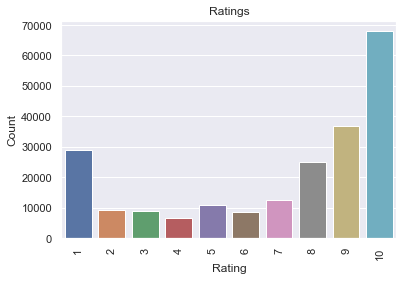

In [117]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns_plot = sns.countplot(x='rating', data=data_clean)
plt.title('Ratings')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.xticks(rotation = 90)
plt.show();
fig = sns_plot.get_figure()
fig.savefig("sns.png")

#### Collect all words

In [64]:
all_words = []
for sentence in data_clean['review']:
    words = nltk.word_tokenize(sentence)
    for token in words:
        all_words.append(token)
all_words

['side',
 'effect',
 'take',
 'combin',
 'bystol',
 'mg',
 'fish',
 'oil',
 'son',
 'halfway',
 'fourth',
 'week',
 'intuniv',
 'becam',
 'concern',
 'began',
 'last',
 'week',
 'start',
 'take',
 'highest',
 'dose',
 'two',
 'day',
 'could',
 'hard',
 'get',
 'bed',
 'cranki',
 'slept',
 'near',
 'hour',
 'drive',
 'home',
 'school',
 'vacat',
 'unusu',
 'call',
 'doctor',
 'monday',
 'morn',
 'said',
 'stick',
 'day',
 'see',
 'school',
 'get',
 'morn',
 'last',
 'two',
 'day',
 'problem',
 'free',
 'much',
 'agreeabl',
 'ever',
 'less',
 'emot',
 'good',
 'thing',
 'less',
 'cranki',
 'rememb',
 'thing',
 'overal',
 'behavior',
 'better',
 'tri',
 'mani',
 'differ',
 'medic',
 'far',
 'effect',
 'use',
 'take',
 'anoth',
 'oral',
 'contracept',
 'pill',
 'cycl',
 'happi',
 'light',
 'period',
 'max',
 'day',
 'side',
 'effect',
 'contain',
 'hormon',
 'gestoden',
 'avail',
 'us',
 'switch',
 'lybrel',
 'ingredi',
 'similar',
 'pill',
 'end',
 'start',
 'lybrel',
 'immedi',
 'first',

#### From the above graph we can observe there are ratings of 10, 9, 8, and 1 are much more than the rest of the ratings.

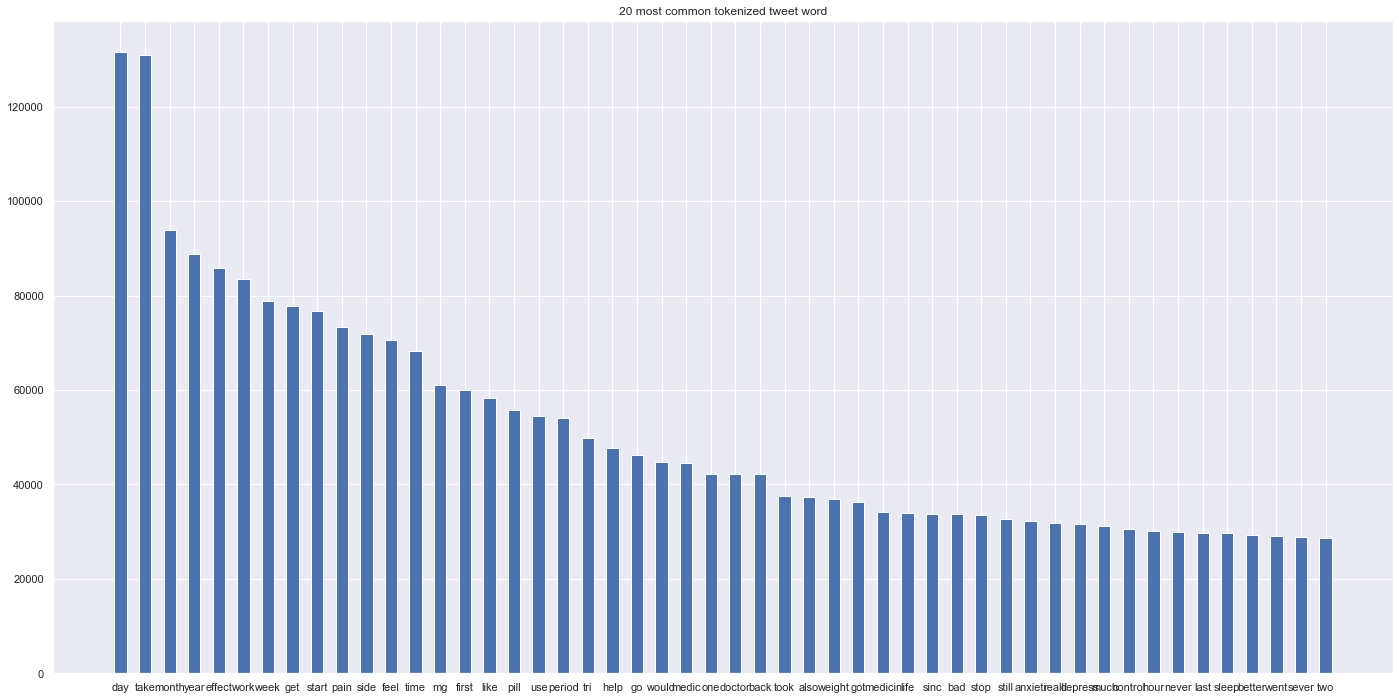

In [65]:
freq = nltk.FreqDist(all_words)
top50 = freq.most_common(50)

label = []
value = []
for i in range(0, 50):
    label.append(top50[i][0])
    value.append(top50[i][1])
fig2 = plt.figure(figsize=(24, 12))
plt.bar(label, value, width = 0.5)
plt.title('20 most common tokenized tweet word')
plt.show()
fig2.savefig("top50.png")

In [66]:
# data_clean.to_csv('D:/UIUC/2021SPRING/IS567Text Mining/Assignment1/IS567proj/data_clean.csv')

data_clean = pd.read_csv('data_clean.csv')
data_clean

In [67]:
from sklearn.model_selection import train_test_split
X = data_clean['review']
y = data_clean['rating']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

#### All packages needed

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, chi2
from mord import LogisticAT, LogisticIT
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

#### Unigram

In [108]:
v = CountVectorizer(ngram_range=(1,1))
X_train_count = v.fit_transform(X_train)
sel1 = SelectKBest(chi2, k=1000).fit(X_train_count, y_train)
X_train_count = sel1.transform(X_train_count)
X_test_count = sel1.transform(v.transform(X_test))


Accuracy:  0.37081812475298165
              precision    recall  f1-score   support

           1       0.44      0.57      0.50      5760
           2       0.17      0.10      0.13      1814
           3       0.13      0.12      0.13      1760
           4       0.08      0.15      0.10      1310
           5       0.13      0.10      0.11      2231
           6       0.11      0.02      0.04      1778
           7       0.16      0.05      0.08      2494
           8       0.21      0.20      0.20      4915
           9       0.28      0.19      0.23      7298
          10       0.52      0.68      0.59     13653

    accuracy                           0.37     43013
   macro avg       0.22      0.22      0.21     43013
weighted avg       0.33      0.37      0.34     43013



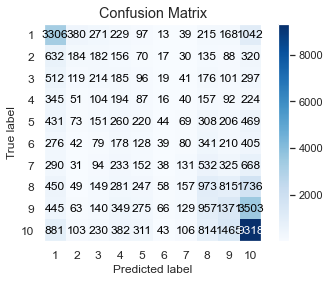

In [70]:
nb1 = MultinomialNB().fit(X_train_count,y_train)
y_pred = nb1.predict(X_test_count)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

Accuracy:  0.3886499430404761
              precision    recall  f1-score   support

           1       0.34      0.69      0.45      5760
           2       0.00      0.00      0.00      1814
           3       0.00      0.00      0.00      1760
           4       0.00      0.00      0.00      1310
           5       0.00      0.00      0.00      2231
           6       0.00      0.00      0.00      1778
           7       0.00      0.00      0.00      2494
           8       0.00      0.00      0.00      4915
           9       0.00      0.00      0.00      7298
          10       0.41      0.93      0.57     13653

    accuracy                           0.39     43013
   macro avg       0.07      0.16      0.10     43013
weighted avg       0.17      0.39      0.24     43013



d:\uiuc\2021spring\is567text mining\assignment1\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\uiuc\2021spring\is567text mining\assignment1\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\uiuc\2021spring\is567text mining\assignment1\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

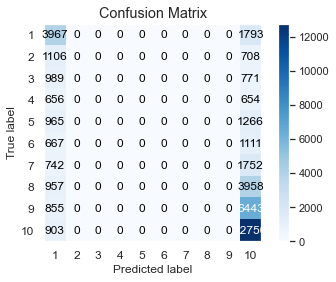

In [71]:
li1 = LogisticIT().fit(X_train_count,y_train)
y_pred = li1.predict(X_test_count)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

Accuracy:  0.7763001883151606
              precision    recall  f1-score   support

           1       0.75      0.85      0.80      5760
           2       0.99      0.67      0.80      1814
           3       0.97      0.68      0.80      1760
           4       0.98      0.65      0.78      1310
           5       0.98      0.63      0.77      2231
           6       0.98      0.63      0.77      1778
           7       0.98      0.63      0.77      2494
           8       0.89      0.64      0.75      4915
           9       0.83      0.68      0.75      7298
          10       0.67      0.95      0.79     13653

    accuracy                           0.78     43013
   macro avg       0.90      0.70      0.78     43013
weighted avg       0.81      0.78      0.77     43013



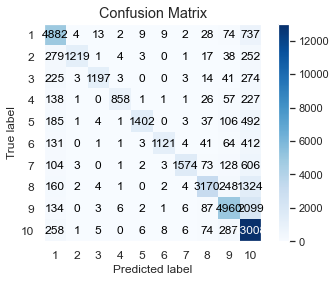

In [72]:
rf1 = RandomForestClassifier().fit(X_train_count, y_train)
y_pred = rf1.predict(X_test_count)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

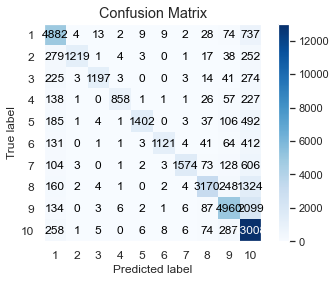

In [118]:
skplt_plot = skplt.metrics.plot_confusion_matrix(y_test, y_pred)
fig = skplt_plot.get_figure()
fig.savefig("confusion2.png")

d:\uiuc\2021spring\is567text mining\assignment1\venv\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy:  0.41268918698997975
              precision    recall  f1-score   support

           1       0.43      0.70      0.53      5760
           2       0.20      0.02      0.03      1814
           3       0.20      0.01      0.03      1760
           4       0.16      0.01      0.01      1310
           5       0.24      0.04      0.07      2231
           6       0.23      0.01      0.01      1778
           7       0.22      0.01      0.02      2494
           8       0.21      0.12      0.15      4915
           9       0.26      0.15      0.19      7298
          10       0.46      0.87      0.60     13653

    accuracy                           0.41     43013
   macro avg       0.26      0.19      0.16     43013
weighted avg       0.33      0.41      0.32     43013



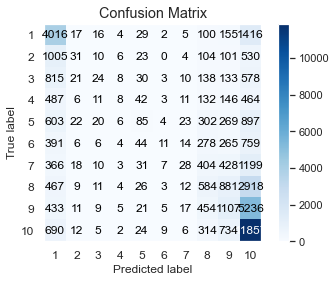

In [73]:
svc1 = LinearSVC().fit(X_train_count, y_train)
y_pred = svc1.predict(X_test_count)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

d:\uiuc\2021spring\is567text mining\assignment1\venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.4161532559923744
              precision    recall  f1-score   support

           1       0.46      0.69      0.55      5760
           2       0.19      0.05      0.07      1814
           3       0.20      0.05      0.08      1760
           4       0.14      0.04      0.06      1310
           5       0.19      0.09      0.12      2231
           6       0.19      0.03      0.06      1778
           7       0.19      0.05      0.08      2494
           8       0.24      0.15      0.18      4915
           9       0.30      0.18      0.22      7298
          10       0.48      0.83      0.61     13653

    accuracy                           0.42     43013
   macro avg       0.26      0.22      0.20     43013
weighted avg       0.34      0.42      0.35     43013



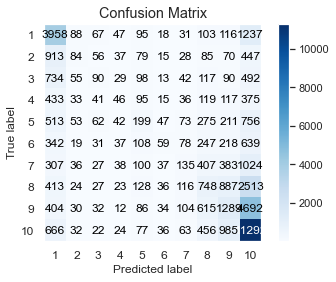

In [74]:
lr1 = LogisticRegression(penalty='l2', C=1.0).fit(X_train_count, y_train)
y_pred = lr1.predict(X_test_count)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

Accuracy:  0.3425708506730523
              precision    recall  f1-score   support

           1       0.33      0.50      0.40      5760
           2       0.14      0.13      0.14      1814
           3       0.12      0.10      0.11      1760
           4       0.11      0.09      0.10      1310
           5       0.15      0.10      0.12      2231
           6       0.12      0.08      0.09      1778
           7       0.14      0.09      0.11      2494
           8       0.24      0.19      0.21      4915
           9       0.31      0.26      0.28      7298
          10       0.50      0.58      0.54     13653

    accuracy                           0.34     43013
   macro avg       0.22      0.21      0.21     43013
weighted avg       0.32      0.34      0.33     43013



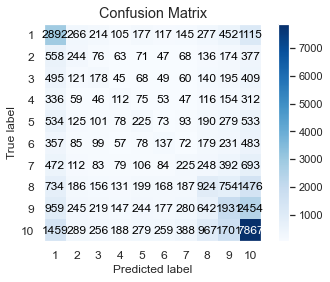

In [75]:
knn1 = KNeighborsClassifier().fit(X_train_count, y_train)
y_pred = knn1.predict(X_test_count)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

Accuracy:  0.7563294817845767
              precision    recall  f1-score   support

           1       0.69      0.83      0.75      5760
           2       0.84      0.68      0.75      1814
           3       0.86      0.69      0.76      1760
           4       0.88      0.66      0.75      1310
           5       0.88      0.64      0.74      2231
           6       0.87      0.64      0.74      1778
           7       0.83      0.64      0.72      2494
           8       0.75      0.66      0.70      4915
           9       0.72      0.71      0.72      7298
          10       0.74      0.87      0.80     13653

    accuracy                           0.76     43013
   macro avg       0.81      0.70      0.74     43013
weighted avg       0.76      0.76      0.75     43013



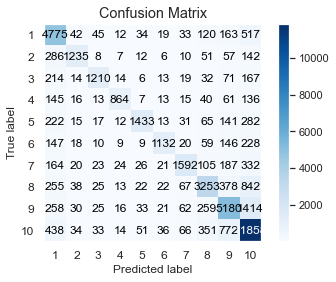

In [76]:
et1 = ExtraTreesClassifier(n_estimators=10).fit(X_train_count, y_train)
y_pred = et1.predict(X_test_count)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

Accuracy:  0.730802315579011
              precision    recall  f1-score   support

           1       0.73      0.76      0.74      5760
           2       0.70      0.69      0.69      1814
           3       0.69      0.70      0.70      1760
           4       0.69      0.67      0.68      1310
           5       0.73      0.64      0.68      2231
           6       0.70      0.65      0.67      1778
           7       0.69      0.65      0.67      2494
           8       0.68      0.67      0.68      4915
           9       0.70      0.72      0.71      7298
          10       0.79      0.80      0.80     13653

    accuracy                           0.73     43013
   macro avg       0.71      0.69      0.70     43013
weighted avg       0.73      0.73      0.73     43013



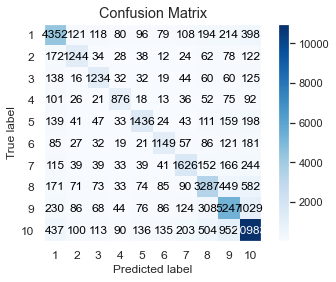

In [77]:
dt1 = DecisionTreeClassifier().fit(X_train_count, y_train)
y_pred = dt1.predict(X_test_count)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

#### TF-IDF

In [78]:
tf = TfidfVectorizer()
X_train_count = tf.fit_transform(X_train)
sel2 = SelectKBest(chi2, k=1000).fit_transform(X_train_count, y_train)
X_train_count = sel1.transform(X_train_count)
X_test_count = sel1.transform(v.transform(X_test))

Accuracy:  0.37377072047985493
              precision    recall  f1-score   support

           1       0.46      0.55      0.50      5760
           2       0.17      0.10      0.12      1814
           3       0.15      0.14      0.14      1760
           4       0.09      0.12      0.10      1310
           5       0.14      0.13      0.13      2231
           6       0.11      0.02      0.03      1778
           7       0.15      0.05      0.08      2494
           8       0.21      0.22      0.22      4915
           9       0.28      0.20      0.24      7298
          10       0.52      0.68      0.59     13653

    accuracy                           0.37     43013
   macro avg       0.23      0.22      0.21     43013
weighted avg       0.33      0.37      0.35     43013



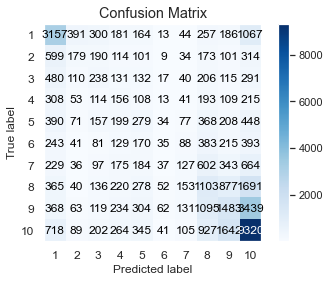

In [79]:
nb2 = MultinomialNB().fit(X_train_count,y_train)
y_pred = nb2.predict(X_test_count)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

Accuracy:  0.38611582544812034
              precision    recall  f1-score   support

           1       0.28      0.83      0.42      5760
           2       0.00      0.00      0.00      1814
           3       0.00      0.00      0.00      1760
           4       0.00      0.00      0.00      1310
           5       0.00      0.00      0.00      2231
           6       0.00      0.00      0.00      1778
           7       0.00      0.00      0.00      2494
           8       0.00      0.00      0.00      4915
           9       0.00      0.00      0.00      7298
          10       0.46      0.87      0.60     13653

    accuracy                           0.39     43013
   macro avg       0.07      0.17      0.10     43013
weighted avg       0.18      0.39      0.25     43013



d:\uiuc\2021spring\is567text mining\assignment1\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\uiuc\2021spring\is567text mining\assignment1\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\uiuc\2021spring\is567text mining\assignment1\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

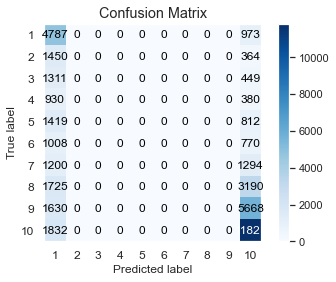

In [80]:
li2 = LogisticIT().fit(X_train_count,y_train)
y_pred = li2.predict(X_test_count)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

Accuracy:  0.6077464952456234
              precision    recall  f1-score   support

           1       0.57      0.78      0.66      5760
           2       0.95      0.43      0.59      1814
           3       0.91      0.43      0.58      1760
           4       0.95      0.39      0.55      1310
           5       0.93      0.36      0.52      2231
           6       0.92      0.34      0.50      1778
           7       0.91      0.34      0.50      2494
           8       0.68      0.44      0.53      4915
           9       0.49      0.60      0.54      7298
          10       0.59      0.79      0.68     13653

    accuracy                           0.61     43013
   macro avg       0.79      0.49      0.56     43013
weighted avg       0.67      0.61      0.60     43013



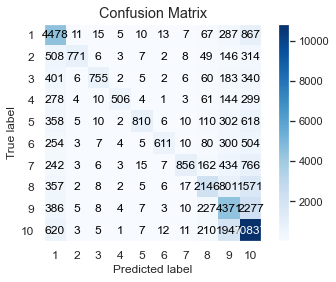

In [81]:
rf2 = RandomForestClassifier().fit(X_train_count, y_train)
y_pred = rf2.predict(X_test_count)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

Accuracy:  0.38125682933066746
              precision    recall  f1-score   support

           1       0.52      0.60      0.56      5760
           2       0.16      0.09      0.11      1814
           3       0.16      0.08      0.11      1760
           4       0.10      0.03      0.04      1310
           5       0.15      0.13      0.14      2231
           6       0.12      0.01      0.03      1778
           7       0.15      0.05      0.08      2494
           8       0.20      0.29      0.23      4915
           9       0.26      0.38      0.31      7298
          10       0.61      0.58      0.59     13653

    accuracy                           0.38     43013
   macro avg       0.24      0.23      0.22     43013
weighted avg       0.37      0.38      0.37     43013



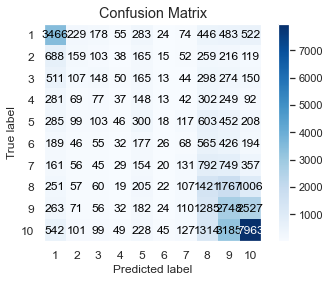

In [82]:
svc2 = LinearSVC().fit(X_train_count, y_train)
y_pred = svc2.predict(X_test_count)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

d:\uiuc\2021spring\is567text mining\assignment1\venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.3192523190663288
              precision    recall  f1-score   support

           1       0.59      0.42      0.49      5760
           2       0.14      0.13      0.14      1814
           3       0.14      0.14      0.14      1760
           4       0.08      0.13      0.10      1310
           5       0.13      0.19      0.15      2231
           6       0.11      0.09      0.10      1778
           7       0.12      0.16      0.14      2494
           8       0.20      0.30      0.24      4915
           9       0.27      0.35      0.30      7298
          10       0.65      0.42      0.51     13653

    accuracy                           0.32     43013
   macro avg       0.24      0.23      0.23     43013
weighted avg       0.39      0.32      0.34     43013



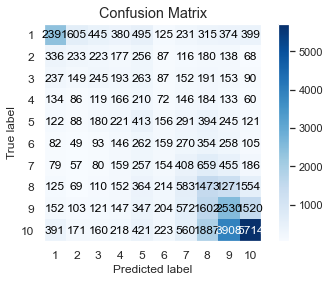

In [83]:
lr2 = LogisticRegression(penalty='l2', C=1.0).fit(X_train_count, y_train)
y_pred = lr2.predict(X_test_count)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

Accuracy:  0.33236463394787624
              precision    recall  f1-score   support

           1       0.33      0.50      0.40      5760
           2       0.12      0.12      0.12      1814
           3       0.11      0.14      0.12      1760
           4       0.08      0.06      0.07      1310
           5       0.14      0.09      0.11      2231
           6       0.10      0.10      0.10      1778
           7       0.15      0.11      0.12      2494
           8       0.23      0.18      0.20      4915
           9       0.29      0.25      0.27      7298
          10       0.52      0.55      0.54     13653

    accuracy                           0.33     43013
   macro avg       0.21      0.21      0.21     43013
weighted avg       0.32      0.33      0.32     43013



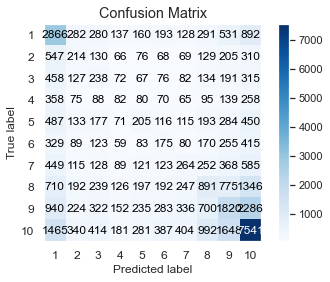

In [84]:
knn2 = KNeighborsClassifier().fit(X_train_count, y_train)
y_pred = knn2.predict(X_test_count)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

Accuracy:  0.5240276195568782
              precision    recall  f1-score   support

           1       0.44      0.74      0.55      5760
           2       0.52      0.39      0.44      1814
           3       0.52      0.41      0.46      1760
           4       0.57      0.36      0.44      1310
           5       0.54      0.35      0.43      2231
           6       0.56      0.32      0.41      1778
           7       0.56      0.33      0.42      2494
           8       0.46      0.41      0.43      4915
           9       0.46      0.48      0.47      7298
          10       0.63      0.64      0.63     13653

    accuracy                           0.52     43013
   macro avg       0.53      0.44      0.47     43013
weighted avg       0.53      0.52      0.52     43013



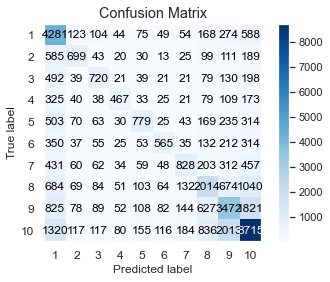

In [85]:
et2 = ExtraTreesClassifier(n_estimators=10).fit(X_train_count, y_train)
y_pred = et2.predict(X_test_count)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

Accuracy:  0.29074930834863877
              precision    recall  f1-score   support

           1       0.33      0.32      0.32      5760
           2       0.21      0.21      0.21      1814
           3       0.19      0.21      0.20      1760
           4       0.15      0.17      0.16      1310
           5       0.16      0.19      0.18      2231
           6       0.17      0.17      0.17      1778
           7       0.17      0.16      0.17      2494
           8       0.22      0.22      0.22      4915
           9       0.25      0.31      0.28      7298
          10       0.46      0.38      0.42     13653

    accuracy                           0.29     43013
   macro avg       0.23      0.24      0.23     43013
weighted avg       0.30      0.29      0.30     43013



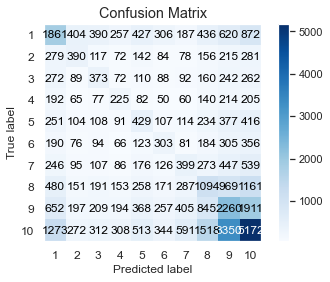

In [86]:
dt2 = DecisionTreeClassifier().fit(X_train_count, y_train)
y_pred = dt2.predict(X_test_count)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

#### Bag of words

In [87]:
bow = CountVectorizer(lowercase=False, ngram_range=(1,1), analyzer="word")
X_train_bow = bow.fit_transform(X_train)
sel3 = SelectKBest(chi2, k=1000).fit(X_train_bow, y_train)
X_train_bow = sel3.transform(X_train_bow)
X_test_bow = sel3.transform(bow.transform(X_test))

Accuracy:  0.37081812475298165
              precision    recall  f1-score   support

           1       0.44      0.57      0.50      5760
           2       0.17      0.10      0.13      1814
           3       0.13      0.12      0.13      1760
           4       0.08      0.15      0.10      1310
           5       0.13      0.10      0.11      2231
           6       0.11      0.02      0.04      1778
           7       0.16      0.05      0.08      2494
           8       0.21      0.20      0.20      4915
           9       0.28      0.19      0.23      7298
          10       0.52      0.68      0.59     13653

    accuracy                           0.37     43013
   macro avg       0.22      0.22      0.21     43013
weighted avg       0.33      0.37      0.34     43013



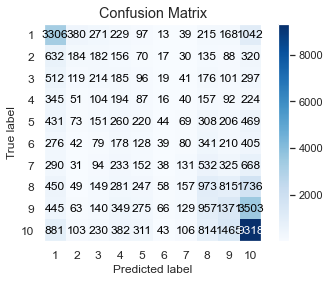

In [88]:
nb3 = MultinomialNB().fit(X_train_bow,y_train)
y_pred = nb3.predict(X_test_bow)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

Accuracy:  0.3886499430404761
              precision    recall  f1-score   support

           1       0.34      0.69      0.45      5760
           2       0.00      0.00      0.00      1814
           3       0.00      0.00      0.00      1760
           4       0.00      0.00      0.00      1310
           5       0.00      0.00      0.00      2231
           6       0.00      0.00      0.00      1778
           7       0.00      0.00      0.00      2494
           8       0.00      0.00      0.00      4915
           9       0.00      0.00      0.00      7298
          10       0.41      0.93      0.57     13653

    accuracy                           0.39     43013
   macro avg       0.07      0.16      0.10     43013
weighted avg       0.17      0.39      0.24     43013



d:\uiuc\2021spring\is567text mining\assignment1\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\uiuc\2021spring\is567text mining\assignment1\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\uiuc\2021spring\is567text mining\assignment1\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

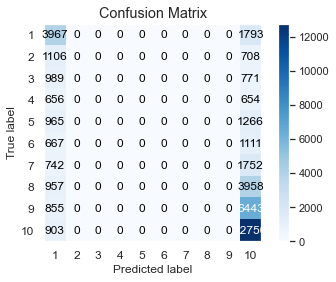

In [89]:
li3 = LogisticIT().fit(X_train_bow,y_train)
y_pred = li3.predict(X_test_bow)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

Accuracy:  0.7766954176644271
              precision    recall  f1-score   support

           1       0.75      0.85      0.80      5760
           2       0.99      0.67      0.80      1814
           3       0.97      0.68      0.80      1760
           4       0.98      0.65      0.79      1310
           5       0.99      0.63      0.77      2231
           6       0.98      0.63      0.77      1778
           7       0.98      0.63      0.77      2494
           8       0.89      0.65      0.75      4915
           9       0.83      0.67      0.74      7298
          10       0.67      0.96      0.79     13653

    accuracy                           0.78     43013
   macro avg       0.90      0.70      0.78     43013
weighted avg       0.81      0.78      0.77     43013



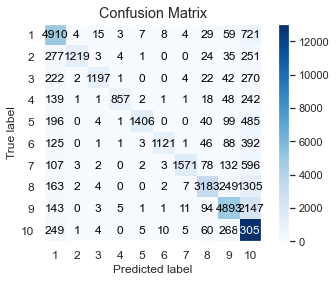

In [90]:
rf3 = RandomForestClassifier().fit(X_train_bow, y_train)
y_pred = rf3.predict(X_test_bow)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

d:\uiuc\2021spring\is567text mining\assignment1\venv\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy:  0.4128751772719875
              precision    recall  f1-score   support

           1       0.43      0.70      0.53      5760
           2       0.21      0.02      0.03      1814
           3       0.19      0.01      0.02      1760
           4       0.16      0.01      0.01      1310
           5       0.24      0.04      0.07      2231
           6       0.23      0.01      0.01      1778
           7       0.21      0.01      0.02      2494
           8       0.21      0.12      0.15      4915
           9       0.26      0.15      0.19      7298
          10       0.46      0.87      0.60     13653

    accuracy                           0.41     43013
   macro avg       0.26      0.19      0.16     43013
weighted avg       0.33      0.41      0.32     43013



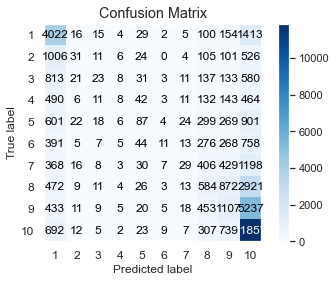

In [91]:
svc3 = LinearSVC().fit(X_train_bow, y_train)
y_pred = svc3.predict(X_test_bow)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

d:\uiuc\2021spring\is567text mining\assignment1\venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.4161532559923744
              precision    recall  f1-score   support

           1       0.46      0.69      0.55      5760
           2       0.19      0.05      0.07      1814
           3       0.20      0.05      0.08      1760
           4       0.14      0.04      0.06      1310
           5       0.19      0.09      0.12      2231
           6       0.19      0.03      0.06      1778
           7       0.19      0.05      0.08      2494
           8       0.24      0.15      0.18      4915
           9       0.30      0.18      0.22      7298
          10       0.48      0.83      0.61     13653

    accuracy                           0.42     43013
   macro avg       0.26      0.22      0.20     43013
weighted avg       0.34      0.42      0.35     43013



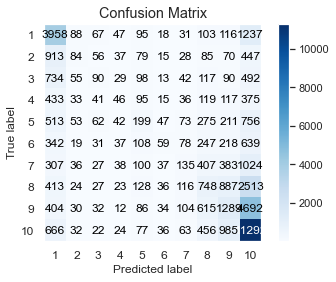

In [92]:
lr3 = LogisticRegression(penalty='l2', C=1.0).fit(X_train_bow, y_train)
y_pred = lr3.predict(X_test_bow)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

Accuracy:  0.3425708506730523
              precision    recall  f1-score   support

           1       0.33      0.50      0.40      5760
           2       0.14      0.13      0.14      1814
           3       0.12      0.10      0.11      1760
           4       0.11      0.09      0.10      1310
           5       0.15      0.10      0.12      2231
           6       0.12      0.08      0.09      1778
           7       0.14      0.09      0.11      2494
           8       0.24      0.19      0.21      4915
           9       0.31      0.26      0.28      7298
          10       0.50      0.58      0.54     13653

    accuracy                           0.34     43013
   macro avg       0.22      0.21      0.21     43013
weighted avg       0.32      0.34      0.33     43013



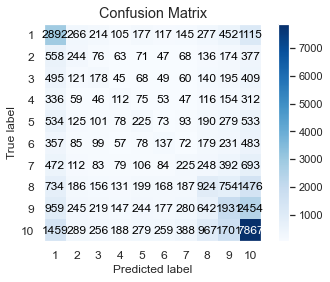

In [93]:
knn3 = KNeighborsClassifier().fit(X_train_bow, y_train)
y_pred = knn3.predict(X_test_bow)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

Accuracy:  0.758584613953921
              precision    recall  f1-score   support

           1       0.70      0.83      0.76      5760
           2       0.85      0.68      0.75      1814
           3       0.87      0.69      0.77      1760
           4       0.89      0.66      0.76      1310
           5       0.87      0.64      0.74      2231
           6       0.88      0.64      0.74      1778
           7       0.83      0.64      0.73      2494
           8       0.76      0.67      0.71      4915
           9       0.72      0.71      0.72      7298
          10       0.75      0.87      0.80     13653

    accuracy                           0.76     43013
   macro avg       0.81      0.70      0.75     43013
weighted avg       0.77      0.76      0.76     43013



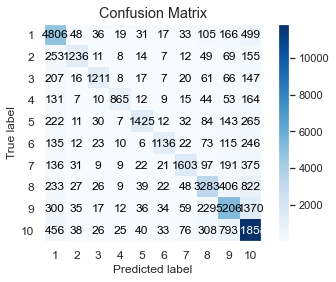

In [94]:
et3 = ExtraTreesClassifier(n_estimators=10).fit(X_train_bow, y_train)
y_pred = et3.predict(X_test_bow)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

Accuracy:  0.7311742961430265
              precision    recall  f1-score   support

           1       0.73      0.75      0.74      5760
           2       0.70      0.68      0.69      1814
           3       0.70      0.70      0.70      1760
           4       0.70      0.67      0.68      1310
           5       0.71      0.64      0.68      2231
           6       0.68      0.65      0.66      1778
           7       0.69      0.65      0.67      2494
           8       0.69      0.68      0.68      4915
           9       0.71      0.72      0.71      7298
          10       0.79      0.80      0.80     13653

    accuracy                           0.73     43013
   macro avg       0.71      0.70      0.70     43013
weighted avg       0.73      0.73      0.73     43013



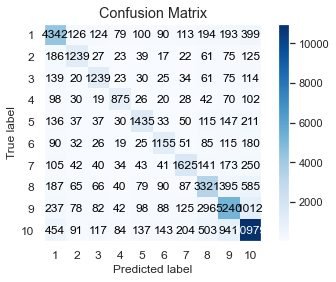

In [95]:
dt3 = DecisionTreeClassifier().fit(X_train_bow, y_train)
y_pred = dt3.predict(X_test_bow)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

d:\uiuc\2021spring\is567text mining\assignment1\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass k=5000 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Accuracy:  0.7769279055169367
              precision    recall  f1-score   support

           1       0.77      0.84      0.80      5760
           2       0.99      0.67      0.80      1814
           3       0.99      0.68      0.81      1760
           4       0.99      0.66      0.79      1310
           5       1.00      0.63      0.77      2231
           6       0.99      0.63      0.77      1778
           7       0.99      0.63      0.77      2494
           8       0.92      0.64      0.75      4915
           9       0.85      0.67      0.75      7298
          10       0.66      0.97      0.78     13653

    accuracy                           0.78     43013
   macro avg       0.91      0.70      0.78     43013
weighted avg       0.82      0.78      0.78     43013



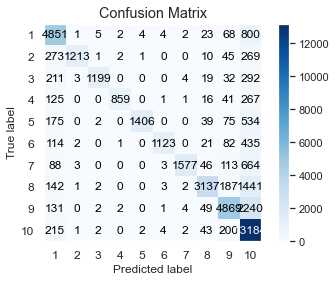

In [103]:
K = 5000

v = CountVectorizer(ngram_range=(1,1))
X_train_count = v.fit_transform(X_train)
sel1 = SelectKBest(chi2, K).fit(X_train_count, y_train)
X_train_count = sel1.transform(X_train_count)
X_test_count = sel1.transform(v.transform(X_test))

rf4 = RandomForestClassifier().fit(X_train_count, y_train)
y_pred = rf4.predict(X_test_count)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

d:\uiuc\2021spring\is567text mining\assignment1\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass k=500 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Accuracy:  0.7733475925882872
              precision    recall  f1-score   support

           1       0.74      0.84      0.79      5760
           2       0.96      0.67      0.79      1814
           3       0.96      0.68      0.80      1760
           4       0.99      0.65      0.78      1310
           5       0.98      0.63      0.76      2231
           6       0.98      0.63      0.76      1778
           7       0.98      0.63      0.76      2494
           8       0.85      0.65      0.73      4915
           9       0.82      0.68      0.74      7298
          10       0.68      0.95      0.79     13653

    accuracy                           0.77     43013
   macro avg       0.89      0.70      0.77     43013
weighted avg       0.81      0.77      0.77     43013



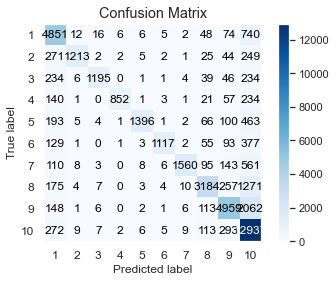

In [104]:
K = 500

v = CountVectorizer(ngram_range=(1,1))
X_train_count = v.fit_transform(X_train)
sel1 = SelectKBest(chi2, K).fit(X_train_count, y_train)
X_train_count = sel1.transform(X_train_count)
X_test_count = sel1.transform(v.transform(X_test))

rf4 = RandomForestClassifier().fit(X_train_count, y_train)
y_pred = rf4.predict(X_test_count)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

d:\uiuc\2021spring\is567text mining\assignment1\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass k=100 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Accuracy:  0.7290586566851882
              precision    recall  f1-score   support

           1       0.70      0.78      0.73      5760
           2       0.87      0.62      0.73      1814
           3       0.89      0.64      0.75      1760
           4       0.89      0.61      0.72      1310
           5       0.88      0.59      0.71      2231
           6       0.91      0.59      0.72      1778
           7       0.88      0.59      0.71      2494
           8       0.76      0.61      0.68      4915
           9       0.73      0.65      0.69      7298
          10       0.67      0.89      0.76     13653

    accuracy                           0.73     43013
   macro avg       0.82      0.66      0.72     43013
weighted avg       0.75      0.73      0.73     43013



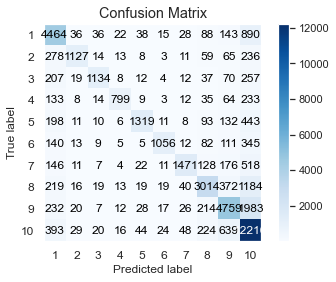

In [105]:
K = 100

v = CountVectorizer(ngram_range=(1,1))
X_train_count = v.fit_transform(X_train)
sel1 = SelectKBest(chi2, K).fit(X_train_count, y_train)
X_train_count = sel1.transform(X_train_count)
X_test_count = sel1.transform(v.transform(X_test))

rf4 = RandomForestClassifier().fit(X_train_count, y_train)
y_pred = rf4.predict(X_test_count)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

d:\uiuc\2021spring\is567text mining\assignment1\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass k=500 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
d:\uiuc\2021spring\is567text mining\assignment1\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\uiuc\2021spring\is567text mining\assignment1\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\u

Accuracy:  0.31950805570408947
              precision    recall  f1-score   support

           1       0.65      0.02      0.03      5760
           2       0.00      0.00      0.00      1814
           3       0.00      0.00      0.00      1760
           4       0.00      0.00      0.00      1310
           5       0.00      0.00      0.00      2231
           6       0.00      0.00      0.00      1778
           7       0.00      0.00      0.00      2494
           8       0.00      0.00      0.00      4915
           9       0.50      0.00      0.00      7298
          10       0.32      1.00      0.48     13653

    accuracy                           0.32     43013
   macro avg       0.15      0.10      0.05     43013
weighted avg       0.27      0.32      0.16     43013



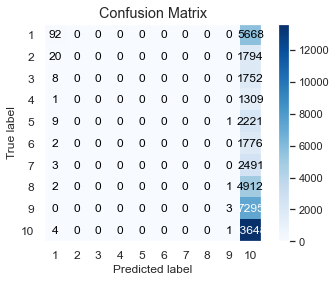

In [106]:
K = 500

v = CountVectorizer(ngram_range=(1,1))
X_train_count = v.fit_transform(X_train)
sel1 = SelectKBest(chi2, K).fit(X_train_count, y_train)
X_train_count = sel1.transform(X_train_count)
X_test_count = sel1.transform(v.transform(X_test))

rf4 = RandomForestClassifier(n_estimators=10, max_depth=5).fit(X_train_count, y_train)
y_pred = rf4.predict(X_test_count)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

In [ ]:
K = 500

v = CountVectorizer(ngram_range=(1,1))
X_train_count = v.fit_transform(X_train)
sel1 = SelectKBest(chi2, K).fit(X_train_count, y_train)
X_train_count = sel1.transform(X_train_count)
X_test_count = sel1.transform(v.transform(X_test))

rf4 = RandomForestClassifier(n_estimators=10, max_depth=5).fit(X_train_count, y_train)
y_pred = rf4.predict(X_test_count)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()






